In [1]:
import pandas as pd
data = pd.read_csv('image_bins.csv')

In [2]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
image_labels = gle.fit_transform(data['class'])
label_mappings = { index:label for index, label in enumerate(gle.classes_) }
label_mappings

{0: 'BAS',
 1: 'EBO',
 2: 'EOS',
 3: 'KSC',
 4: 'LYA',
 5: 'LYT',
 6: 'MMZ',
 7: 'MOB',
 8: 'MON',
 9: 'MYB',
 10: 'MYO',
 11: 'NGB',
 12: 'NGS',
 13: 'PMB',
 14: 'PMO'}

In [4]:
data['class'] = image_labels

In [5]:
subset_1 = data[data['class'].isin([12,5])]

In [6]:
subset_1

,35,85,125,165,205,245,class
607,13845.996153,4194.276336,27986.796023,43190.837228,68158.098372,2623.995888,5
608,11805.183576,1188.746937,6773.514456,70198.142226,69290.520032,743.892773,5
609,11812.402339,2065.323226,13415.429524,47956.843378,65416.551344,19333.450189,5
610,11056.601604,2505.297605,9997.811438,30956.858216,104839.120517,644.310620,5
611,11362.721004,1137.129978,5150.162710,50264.427865,84755.674971,7329.883473,5
...,...,...,...,...,...,...,...
14895,7269.881974,1772.435342,7893.839875,49235.917024,88031.418245,5796.507539,12
14896,6515.850927,3214.905426,48807.516938,48531.353297,34646.910733,18283.462678,12
14897,5793.687301,1056.148598,4317.174566,56719.822163,84658.435743,7454.731629,12
14898,2562.948500,1009.775338,3172.103861,41940.199051,84340.623280,26974.349970,12


In [7]:
subset_1.replace({5:0,12:1}, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [8]:
subset_1

,35,85,125,165,205,245,class
607,13845.996153,4194.276336,27986.796023,43190.837228,68158.098372,2623.995888,0
608,11805.183576,1188.746937,6773.514456,70198.142226,69290.520032,743.892773,0
609,11812.402339,2065.323226,13415.429524,47956.843378,65416.551344,19333.450189,0
610,11056.601604,2505.297605,9997.811438,30956.858216,104839.120517,644.310620,0
611,11362.721004,1137.129978,5150.162710,50264.427865,84755.674971,7329.883473,0
...,...,...,...,...,...,...,...
14895,7269.881974,1772.435342,7893.839875,49235.917024,88031.418245,5796.507539,1
14896,6515.850927,3214.905426,48807.516938,48531.353297,34646.910733,18283.462678,1
14897,5793.687301,1056.148598,4317.174566,56719.822163,84658.435743,7454.731629,1
14898,2562.948500,1009.775338,3172.103861,41940.199051,84340.623280,26974.349970,1


In [9]:
subset_1['class'].value_counts()

1    8484
0    3937
Name: class, dtype: int64

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
X = subset_1.drop(columns=['class'])
y = subset_1['class']
weights = {0:4.0, 1:1.0 }
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=50)
logistic_model = LogisticRegression(random_state=50, class_weight=weights, solver='lbfgs', multi_class='multinomial', max_iter = 500)
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 4.0, 1: 1.0}, max_iter=500,
                   multi_class='multinomial', random_state=50)

In [29]:
training_score = logistic_model.score(X_train, y_train)*100
print('The training set got a score of {} %'.format(round(training_score,3)))

The training set got a score of 57.81 %


In [30]:
predictions = logistic_model.predict(X_test)

In [31]:
print("The model achieved an accuracy score of {} %" .format(100*round(logistic_model.score(X_test, y_test), 5)))

The model achieved an accuracy score of 57.75900000000001 %


In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.41      0.85      0.56       961
           1       0.87      0.45      0.60      2145

    accuracy                           0.58      3106
   macro avg       0.64      0.65      0.58      3106
weighted avg       0.73      0.58      0.58      3106



<AxesSubplot:>

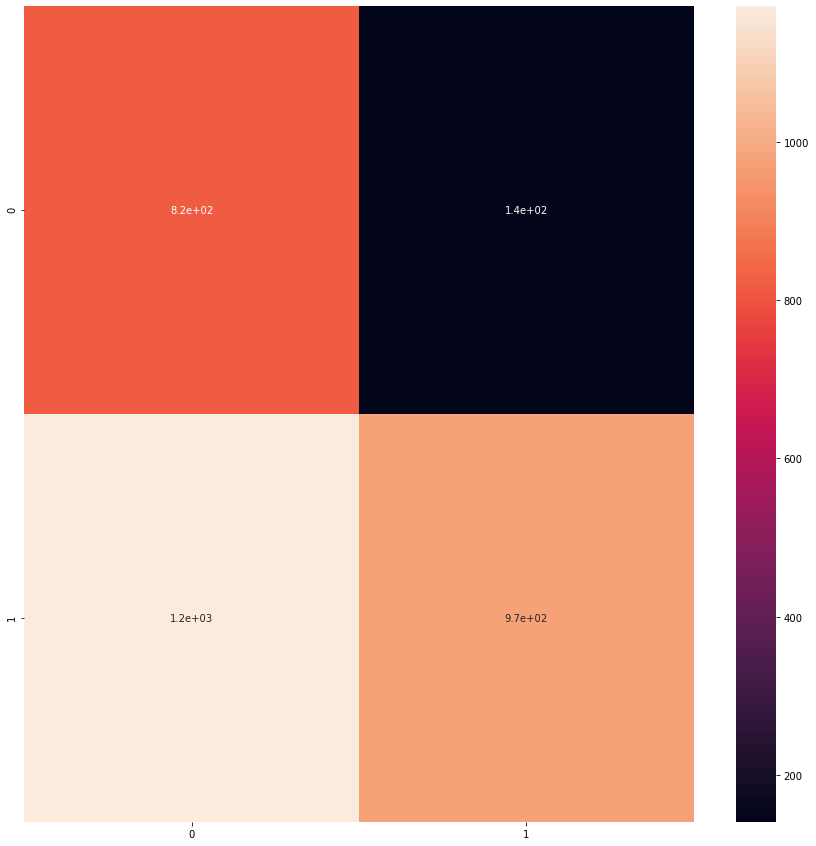

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
cf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(cf_matrix, annot=True)

In [34]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
weights = {0:3.0, 1:1.0 }
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear', class_weight=weights))

In [35]:
clf.fit(X_train,y_train)
svm_predict = clf.predict(X_test)

<AxesSubplot:>

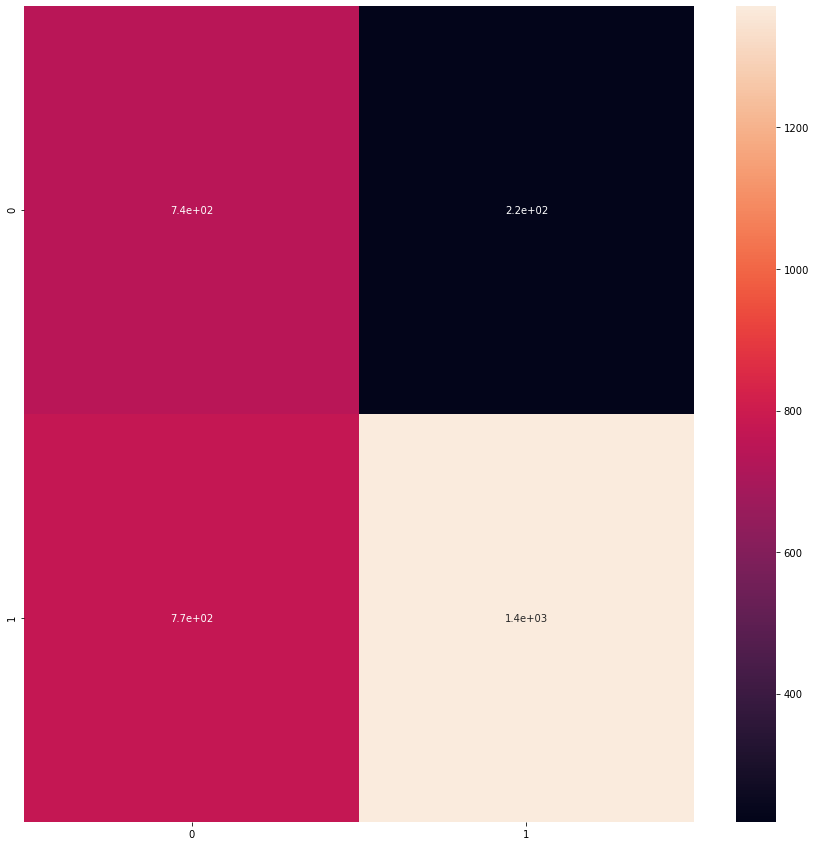

In [36]:
plt.figure(figsize=(15,15))
cf_matrix_2 = confusion_matrix(y_test,svm_predict)
sns.heatmap(cf_matrix_2, annot=True)

In [ ]:
### we still see the model underfit the two major classes. Now lets see if SMOTE analysis yields any difference. 

In [37]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train,y_train)

In [1]:
from collections import Counter
print(Counter(y_res))

NameError: name 'y_res' is not defined

In [39]:
clf = make_pipeline(StandardScaler(), svm.SVC(kernel='linear'))

In [40]:
clf.fit(X_res,y_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

In [41]:
svm_predict_2 = clf.predict(X_test)

<AxesSubplot:>

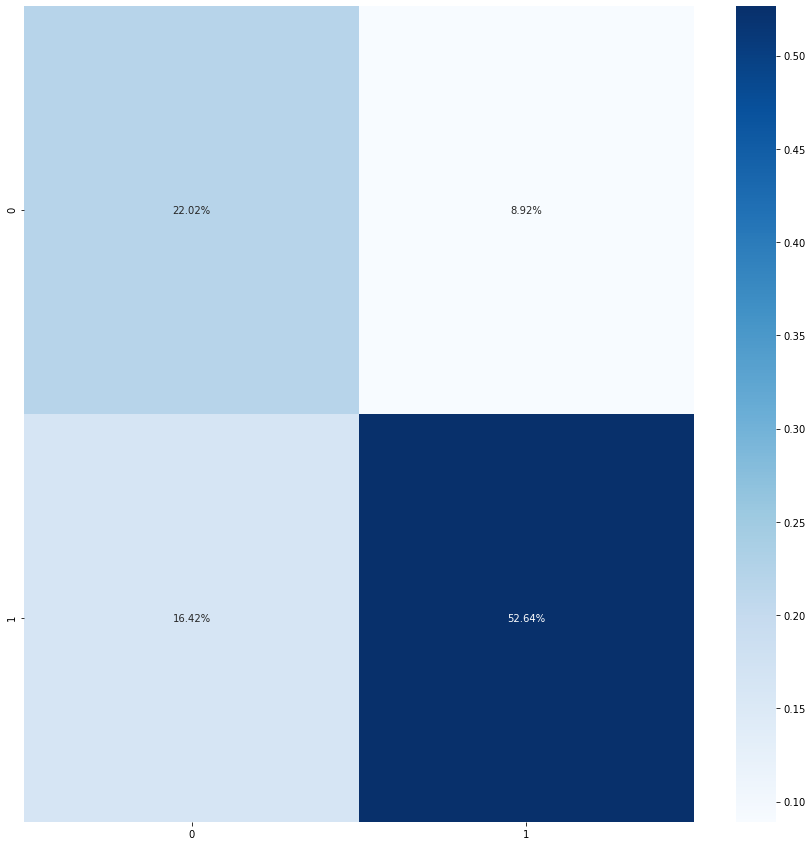

In [45]:
import numpy as np
plt.figure(figsize=(15,15))
cf_matrix_2 = confusion_matrix(y_test, svm_predict_2)
sns.heatmap(cf_matrix_2/np.sum(cf_matrix_2), annot=True, 
            fmt='.2%', cmap='Blues')

In [43]:
print(classification_report(y_test, svm_predict_2))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63       961
           1       0.86      0.76      0.81      2145

    accuracy                           0.75      3106
   macro avg       0.71      0.74      0.72      3106
weighted avg       0.77      0.75      0.75      3106

